# **Retrieval with k-NN**

In [1]:
import sys

sys.path.insert(0, "..\\Scripts")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Load dataset**

In [2]:
base_feature_path = '../Features/features/'
base_labels_path = '../Features/labels/'

### **Load train small dataset**


In [3]:
feat_small = np.load(base_feature_path + 'mobilenet_v3_classifier.npy')
labs_small = np.load(base_labels_path + 'mobilenet_v3_classifier.npy')

In [4]:
df_small = pd.read_csv('../Dataset/train_small.csv', header=None)
df_small.head()

,0,1
0,train_059371.jpg,0
1,train_059389.jpg,0
2,train_059425.jpg,0
3,train_059445.jpg,0
4,train_059516.jpg,0


### **Load unlabelled dataset**

In [5]:
feat_unlabelled = np.load(base_feature_path + 'mobilenet_v3_classifier_unlabelled.npy')

In [6]:
df_unlabelled = pd.read_csv('../Dataset/train_unlabeled.csv', header=None)
df_unlabelled.head()

,0,1
0,train_059329.jpg,-1
1,train_059330.jpg,-1
2,train_059331.jpg,-1
3,train_059332.jpg,-1
4,train_059333.jpg,-1


## **Retrieval with k-NN**

In [7]:
from ImageRetrieval import KNNRetrieval

In [8]:
retrieval = KNNRetrieval(feat_small, labs_small, k=10)

In [9]:
augmented_labels = retrieval.retrieve_images(feat_unlabelled)

100%|██████████| 251/251 [00:45<00:00,  5.53it/s]


## **Save Results**

In [10]:
df_results = df_small.copy()
df_results.columns = ["Image", "Label"]
df_results.head()

,Image,Label
0,train_059371.jpg,0
1,train_059389.jpg,0
2,train_059425.jpg,0
3,train_059445.jpg,0
4,train_059516.jpg,0


In [11]:
tmp = pd.DataFrame({"Image": df_unlabelled[0], "Label": augmented_labels})
tmp = tmp[tmp["Label"] != -1]
tmp.head()

,Image,Label
1,train_059330.jpg,0
2,train_059331.jpg,0
3,train_059332.jpg,0
7,train_059336.jpg,0
9,train_059338.jpg,0


In [12]:
df_results = pd.concat([df_results, tmp])
df_results.sort_values(by="Label", inplace=True)
df_results.reset_index(drop=True, inplace=True)
df_results.head()

,Image,Label
0,train_059371.jpg,0
1,train_059791.jpg,0
2,train_059792.jpg,0
3,train_059796.jpg,0
4,train_059798.jpg,0


In [13]:
df_results.to_csv("../Dataset/train_augmented_3.csv", header=False, index=False)

## **How the number of labels has changed**

In [14]:
import seaborn as sns
sns.set_style("dark")

In [15]:
df_small.columns = ["Image", "Label"]

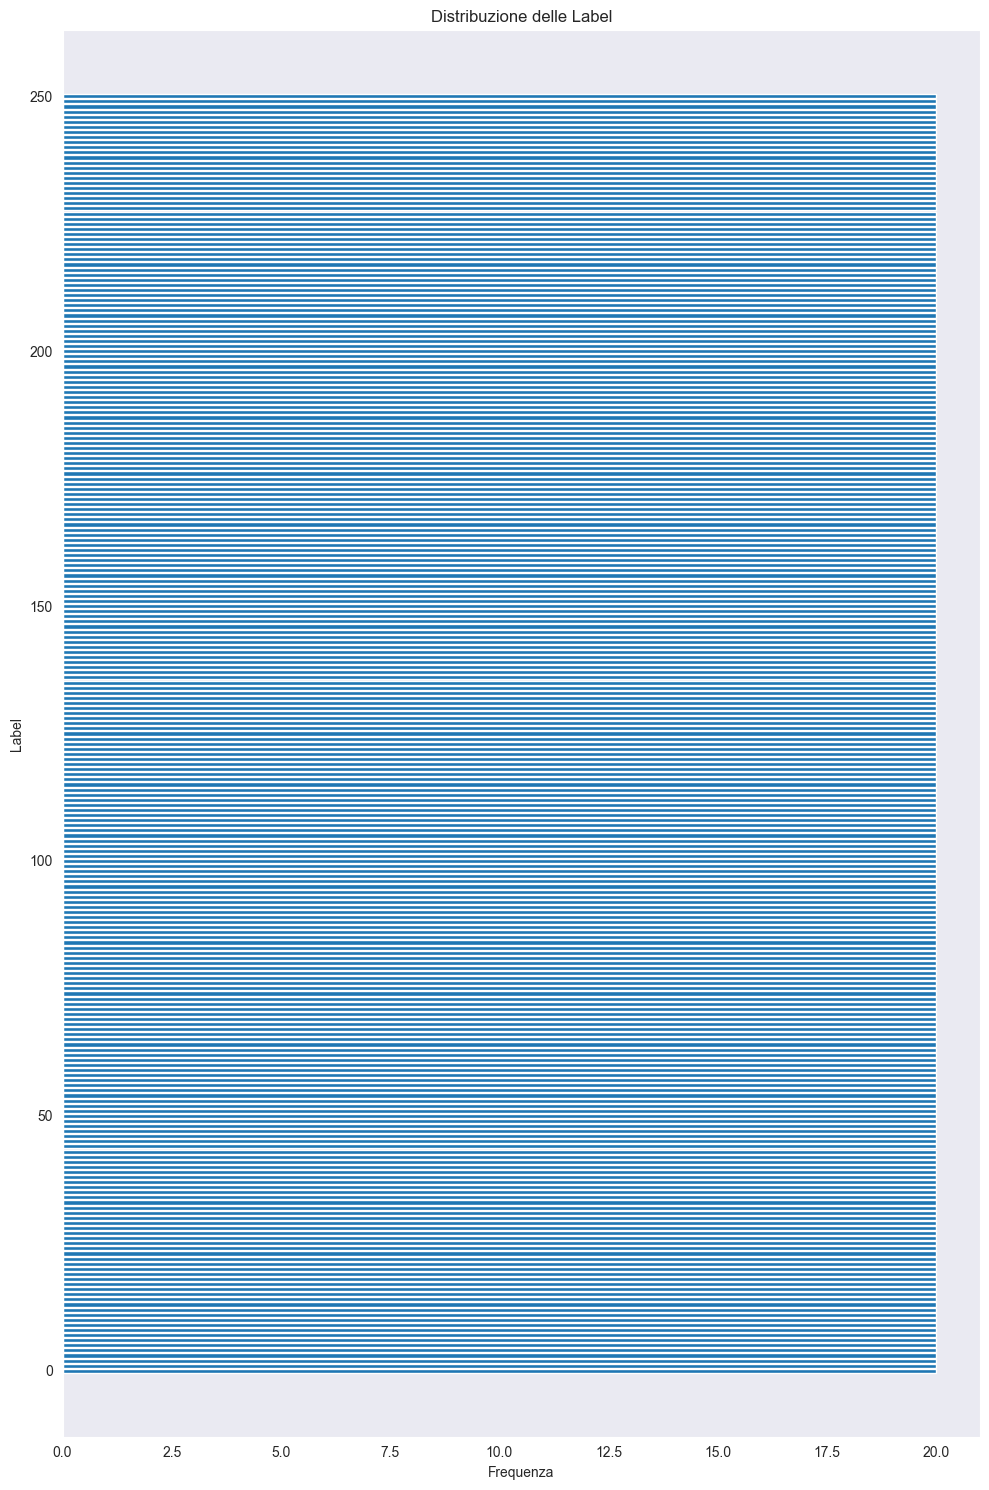

In [16]:
plt.figure(figsize=(10, 15))
label_counts = df_small['Label'].value_counts()
plt.barh(label_counts.index, label_counts.values)
plt.xlabel('Frequenza')
plt.ylabel('Label')
plt.title('Distribuzione delle Label')
plt.tight_layout()
plt.show()

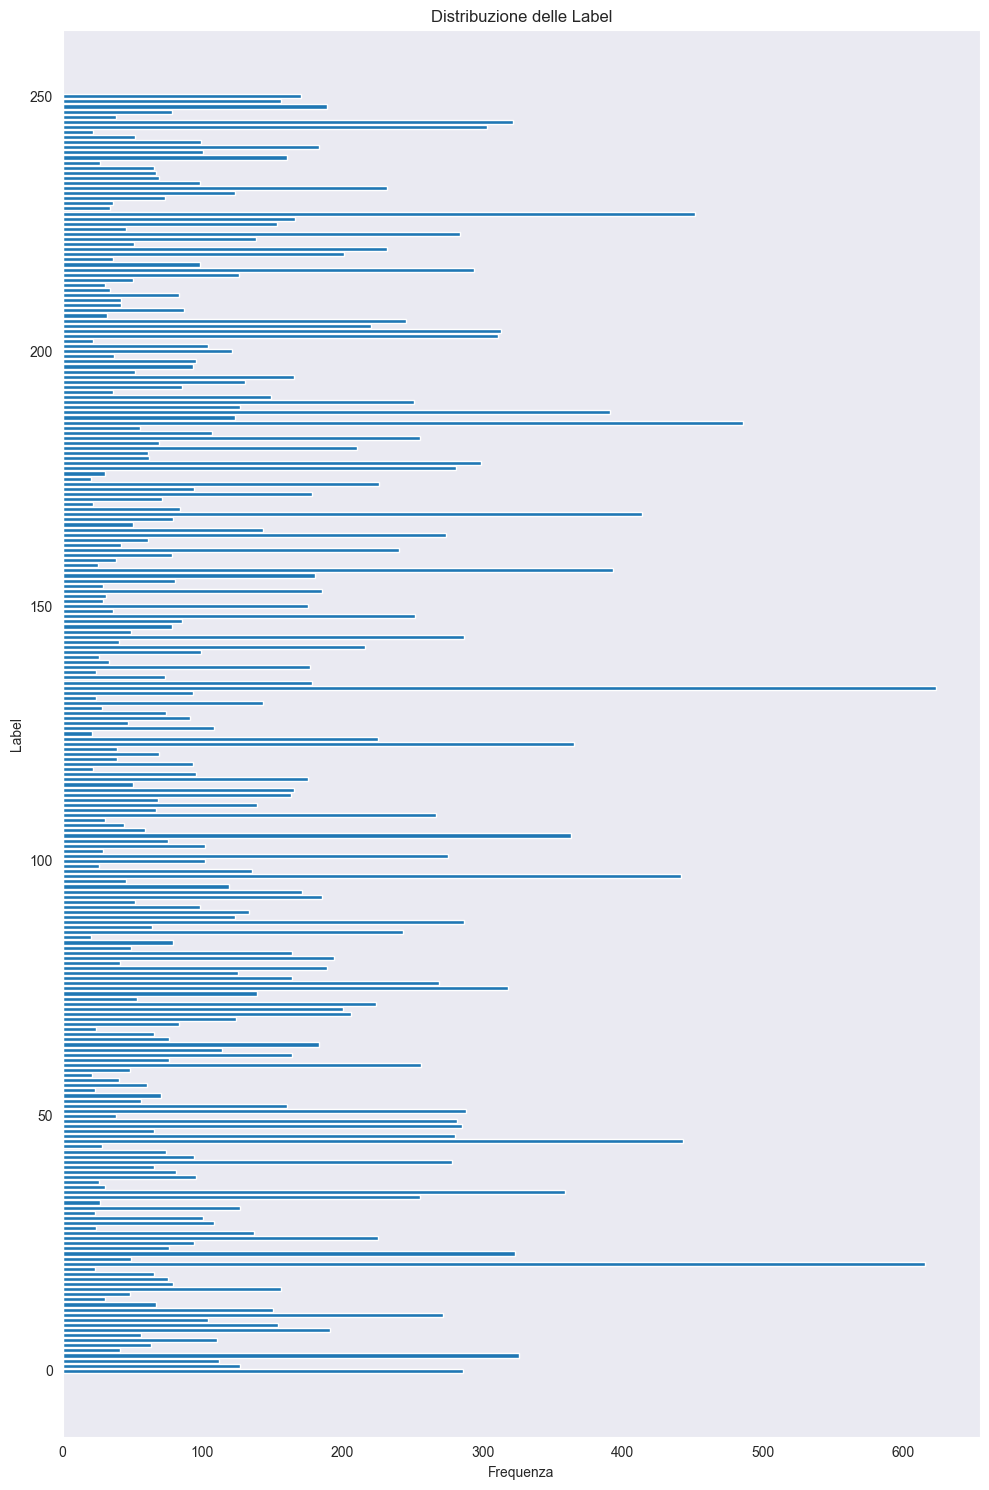

In [17]:
plt.figure(figsize=(10, 15))
label_counts = df_results['Label'].value_counts()
plt.barh(label_counts.index, label_counts.values)
plt.xlabel('Frequenza')
plt.ylabel('Label')
plt.title('Distribuzione delle Label')
plt.tight_layout()
plt.show()

## **Create a folder with the image for each label**

In [23]:
import cv2

In [18]:
df_folder = pd.read_csv('../Dataset/train_augmented_3.csv', header=None)
df_folder.columns = ["Image", "Label"]
df_folder.head()

,Image,Label
0,train_059371.jpg,0
1,train_059791.jpg,0
2,train_059792.jpg,0
3,train_059796.jpg,0
4,train_059798.jpg,0


In [24]:
for i in range(0, df_folder["Label"].nunique()):
    os.makedirs(
        os.path.join("..", "Dataset", "train_augmented_3", str(i)), exist_ok=True
    )
    print(20 * "--", i, 20 * "--")
    tmp = df_folder[df_folder["Label"] == i]
    for j in tmp.iterrows():
        path_initial = os.path.join("..", "Dataset", "train_set", j[1]["Image"])
        path = os.path.join("..", "Dataset", "train_augmented_3", str(i), j[1]["Image"])
        img = cv2.imread(path_initial)
        cv2.imwrite(path, img)

---------------------------------------- 0 ----------------------------------------
---------------------------------------- 1 ----------------------------------------
---------------------------------------- 2 ----------------------------------------
---------------------------------------- 3 ----------------------------------------
---------------------------------------- 4 ----------------------------------------
---------------------------------------- 5 ----------------------------------------
---------------------------------------- 6 ----------------------------------------
---------------------------------------- 7 ----------------------------------------
---------------------------------------- 8 ----------------------------------------
---------------------------------------- 9 ----------------------------------------
---------------------------------------- 10 ----------------------------------------
---------------------------------------- 11 -------------------------------